# Importing Libraries

In [1]:
from mcfit import P2xi, xi2P
import sys
sys.path.append('/Users/s2223060/Desktop/primordial_features/')
import numpy as np
import matplotlib.pyplot as plt
from ps_constructor import PowerSpectrumConstructor
from scipy.interpolate import interp1d

# Loading the data

In [2]:
fn = '/Users/s2223060/Desktop/primordial_features/cosmologies/power_spectrum/BOSS_z1.txt'

#momentum array to evaluate the data on
kh_data = np.logspace(-4, np.log10(10), 2**13)

ps_model_lin = PowerSpectrumConstructor(fn, 'lin', kh_data)
ps = PowerSpectrumConstructor(fn, 'None', kh_data)

B = 1
sigma_nl = 7
sigma_s = 0
a0 = 0
a1 = 0
a2 = 0
a3 = 0
a4 = 0
alpha = 1
A = 0.05
omega_lin = 400
omega_log = 30
phi = 0
params = [B, a0, a1, a2, a3, a4, alpha,sigma_nl, sigma_s]

In [3]:
ps_lin = ps_model_lin.Evaluate_bare(params + [A, omega_lin, phi])

params = [B, a0, a1, a2, a3, a4, alpha, 100000, sigma_s]
ps_SMOOTH = ps_model_lin.Evaluate_bare(params + [A, omega_lin, phi])

(0.0, 0.2)

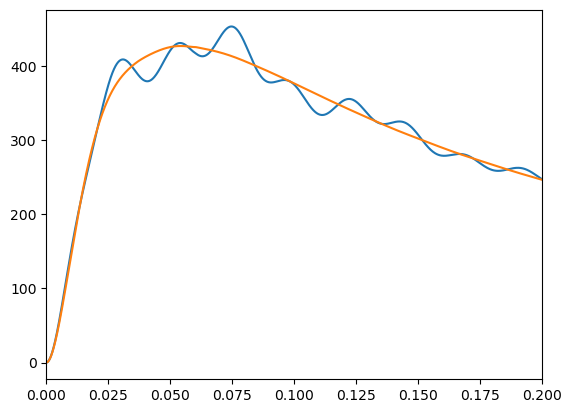

In [4]:
plt.figure()
plt.plot(kh_data, kh_data*ps_lin)
plt.plot(kh_data, kh_data*ps_SMOOTH)
plt.xlim((0,0.2))

Now, let us load the survey window function of BOSS high-z NGC and low-z NGC:

In [5]:
from scipy.interpolate import InterpolatedUnivariateSpline

In [7]:
BOSS_wf_z1_data = np.loadtxt('/Users/s2223060/OneDrive - University of Edinburgh/BOSS/winfunc_BOSS_highz_North.txt')
BOSS_wf_z2_data = np.loadtxt('/Users/s2223060/OneDrive - University of Edinburgh/BOSS/winfunc_BOSS_lowz_South.txt')

BOSS_wf_z1 = InterpolatedUnivariateSpline(BOSS_wf_z1_data[:,0], BOSS_wf_z1_data[:,1]/BOSS_wf_z1_data[0,1], ext =3)
BOSS_wf_z2 = InterpolatedUnivariateSpline(BOSS_wf_z2_data[:,0], BOSS_wf_z2_data[:,1]/BOSS_wf_z2_data[0,1], ext =3)

Text(0, 0.5, 'Q(s)')

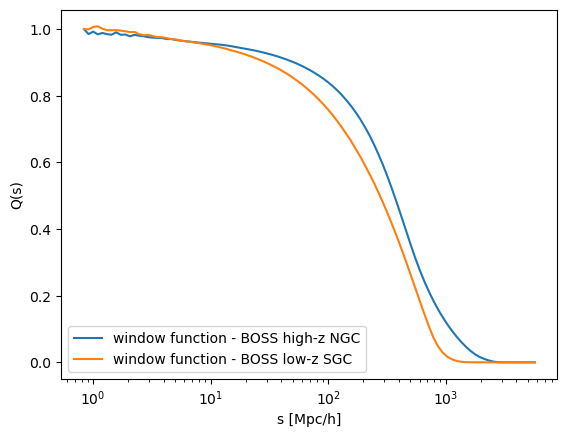

In [8]:
plt.figure()
plt.semilogx()
plt.plot(BOSS_wf_z1_data[:,0],BOSS_wf_z1(BOSS_wf_z1_data[:,0]), label = 'window function - BOSS high-z NGC')
plt.plot(BOSS_wf_z2_data[:,0],BOSS_wf_z2(BOSS_wf_z2_data[:,0]), label = 'window function - BOSS low-z SGC')
plt.legend()
plt.xlabel('s [Mpc/h]')
plt.ylabel('Q(s)')

To convolve the theory in Fourier Space with the window function in configuration space we should:

1) Transform the P(k) into $\xi(s)$ via Hankel transform;
2) Multiply $\xi(s)$ by the window function to obtain $\xi(s)Q(s)$;
3) Take the inverse Hankel transform of $\xi(s)Q(s)$.

note: The hankel transform should be performed using the function computed on log-spaced bins. The number of bins should be a multiple of 2: $2^{10}$, $2^{12}$, etc...

In [9]:
s,xi_model = P2xi(kh_data)(ps_lin)
s,xi_smooth = P2xi(kh_data)(ps_SMOOTH)

xi_model_BOSS_highz_north = xi_model*BOSS_wf_z1(s)
xi_model_BOSS_lowz_south = xi_model*BOSS_wf_z2(s)

xi_smooth_BOSS_highz_north = xi_smooth*BOSS_wf_z1(s)
xi_smooth_BOSS_lowz_south = xi_smooth*BOSS_wf_z2(s)

Plotting the correlation function:

Text(0, 0.5, '$\\xi(s)$')

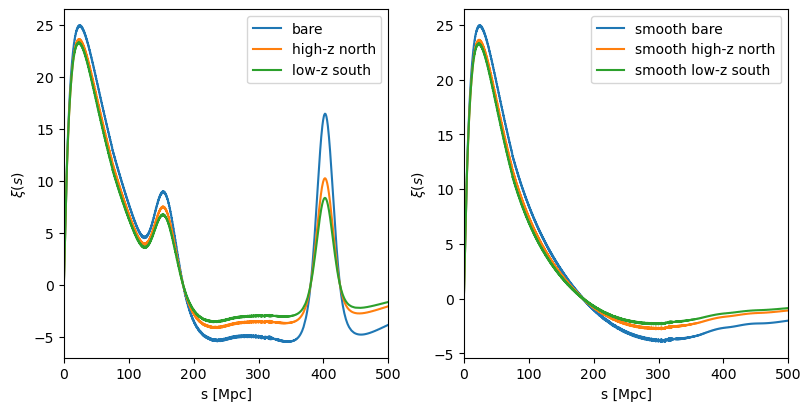

In [10]:
h = 0.67 #Standard value in the code
fig, ax = plt.subplots(1,2, figsize = (8,4), constrained_layout = True)
ax[0].plot(s/h, s**2*xi_model, label = 'bare')
ax[0].plot(s/h, s**2*xi_model_BOSS_highz_north, label = 'high-z north')
ax[0].plot(s/h, s**2*xi_model_BOSS_lowz_south, label = 'low-z south')
ax[0].set_xlim((0,500))
ax[0].legend()
ax[0].set_xlabel('s [Mpc]')
ax[0].set_ylabel(r'$\xi(s)$')


ax[1].plot(s/h, s**2*xi_smooth, label = 'smooth bare')
ax[1].plot(s/h, s**2*xi_smooth_BOSS_highz_north, label = 'smooth high-z north')
ax[1].plot(s/h, s**2*xi_smooth_BOSS_lowz_south, label = 'smooth low-z south')
ax[1].set_xlim((0,500))
ax[1].legend()
ax[1].set_xlabel('s [Mpc]')
ax[1].set_ylabel(r'$\xi(s)$')

Now, transform back to fourier space

In [18]:
kh, ps_model_BOSS_highz_north = xi2P(s)(xi_model_BOSS_highz_north)
kh, ps_model_BOSS_lowz_south = xi2P(s)(xi_model_BOSS_lowz_south)

kh, ps_smooth_BOSS_highz_north = xi2P(s)(xi_smooth_BOSS_highz_north)
kh, ps_smooth_BOSS_lowz_south = xi2P(s)(xi_smooth_BOSS_lowz_south)

Text(0, 0.5, 'k P(k)')

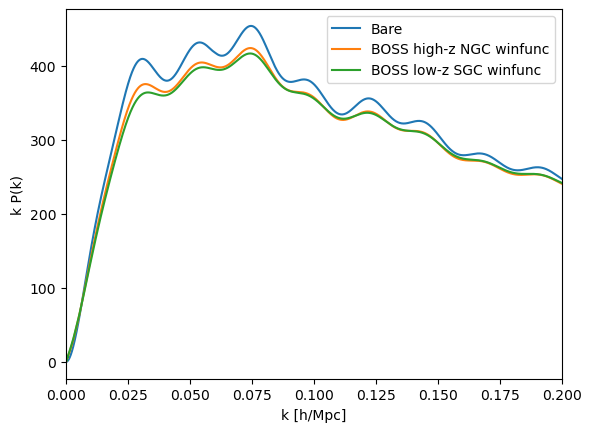

In [17]:
plt.figure()
plt.plot(kh, kh*ps_lin, label = "Bare")
plt.plot(kh, kh*ps_model_BOSS_highz_north, label = "BOSS high-z NGC winfunc")
plt.plot(kh, kh*ps_model_BOSS_lowz_south, label = "BOSS low-z SGC winfunc")
plt.xlim((0,0.2))
plt.legend()
plt.xlabel('k [h/Mpc]')
plt.ylabel('k P(k)')

For the wiggly power spectrum

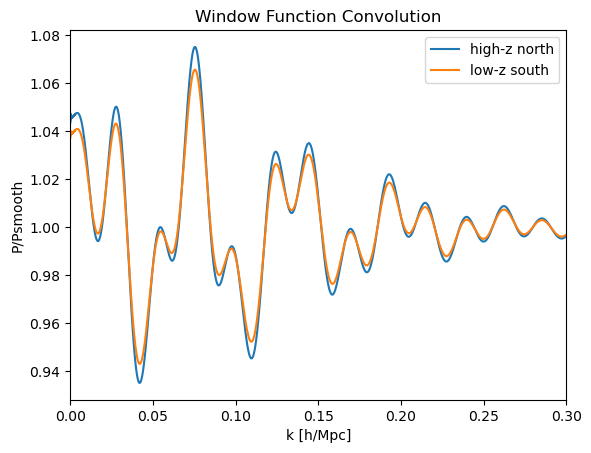

In [23]:
plt.figure()
plt.plot(kh, ps_model_BOSS_highz_north/ps_smooth_BOSS_highz_north, label = 'high-z north')
plt.plot(kh, ps_model_BOSS_lowz_south/ps_smooth_BOSS_lowz_south, label = 'low-z south')
plt.xlim((0,0.3))
plt.xlabel('k [h/Mpc]')
plt.ylabel('P/Psmooth')
plt.title('Window Function Convolution')
plt.legend()